<b>Conexión a BigQuery</b>

In [6]:
from google.cloud import bigquery
import os

In [7]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "prctica-etl-20e312be6158.json"

In [8]:
client = bigquery.Client(location= 'southamerica-west1', project= 'prctica-etl')

<b>LIBRERÍAS</b>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Análisis Business</b>

In [5]:
query = "SELECT * FROM `prctica-etl.Yelp.business`"
df1 = client.query(query).to_dataframe()
df1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,platform
0,7J3rAruSjVPiDOPdA32upw,Dinner Lab,Various Nashville locations,Nashville,CA,,36.2130528,-86.7265483,3.5,7,"Specialty Food, Food",Yelp
1,TbG9cKTpRdALSFyAN5XWqQ,McDonald's,97 Street 165 Avenue,Eaux Claires,CA,T5Z,53.6261739118,-113.4915002539,1.5,13,"Fast Food, Burgers, Restaurants",Yelp
2,TvnqERlxc8lFnpERkP8JCg,Gong Cha,"2000 NJ-38, Ste 1500, Cherry Hill Mall",Cherry Hill,CA,08002,39.942495,-75.0255696,4.0,8,"Coffee & Tea, Food, Bubble Tea",Yelp
3,Rag7H_6BDv9SBoMZxLqD-w,Ten Asian Food Hall,"706 Haddonfield Rd, Ste 5",Cherry Hill,CA,08002,39.9297617,-75.0314522,4.0,96,"Restaurants, Poke, Asian Fusion, Food, Bubble Tea",Yelp
4,xIshpRKiMtfei4_sLUhAxw,Chicken Now,2000 Rt 38,Cherry Hill,CA,08002,39.940745,-75.025747,3.5,18,"Chicken Wings, Fast Food, Restaurants",Yelp


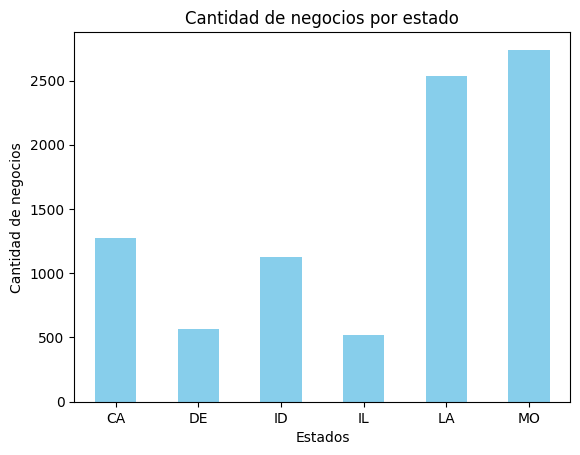

In [6]:
v1 = df1['business_id'].groupby(df1['state']).count()
v1.plot(kind = 'bar', color = 'skyblue')

plt.xlabel('Estados')
plt.ylabel('Cantidad de negocios')
plt.title('Cantidad de negocios por estado')
plt.xticks(rotation=0)

plt.show()

En este gráfico podemos visualizar la cantidad de negocios registrados en Yelp por Estados. Se destacan con mayor cantidad de comercios, Luisiana y Misuri, y en menor cantidad, Delaware e Illinois. Podemos concluir que el desabastecimiento de comercios, es mayor en estos últimos dos.

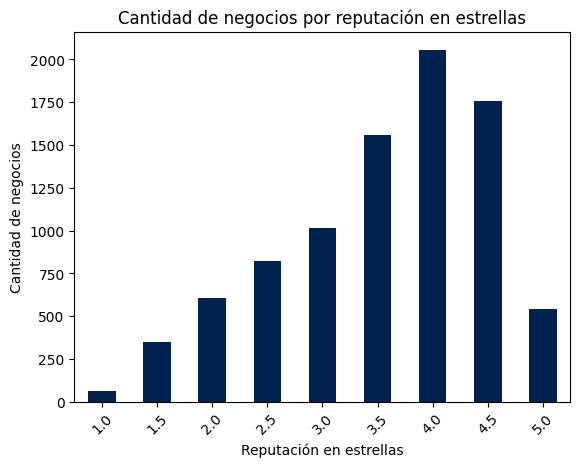

In [7]:
v2 = df1['business_id'].groupby(df1['stars']).count()
v2.plot(kind='bar', colormap = 'cividis')

plt.xlabel('Reputación en estrellas')
plt.ylabel('Cantidad de negocios')
plt.title('Cantidad de negocios por reputación en estrellas')
plt.xticks(rotation=45)

plt.show()

Dentro de los comercios registrados en Yelp, podemos ver que la mayoría está puntuado entre 3.5 y 4.5 estrellas. Y que, forman parte de los casos especiales, aquellos comercios con una puntuación de 1.0 estrella, podemos considerarlos outliers en este análisis. Lo que respecta a los comercios que estén puntuados en 5.0 estrellas, son aquellos que buscamos mantener y ver un incremento en el análisis del próximo período. Actualmente representan menos del 5% del total de nuestra muestra.

In [10]:
food_services = ['restaurant','cafe', 'pizza','pub','bar','coffee','breakfast','brunch','bakery','sandwich','ice cream','gastropubs']

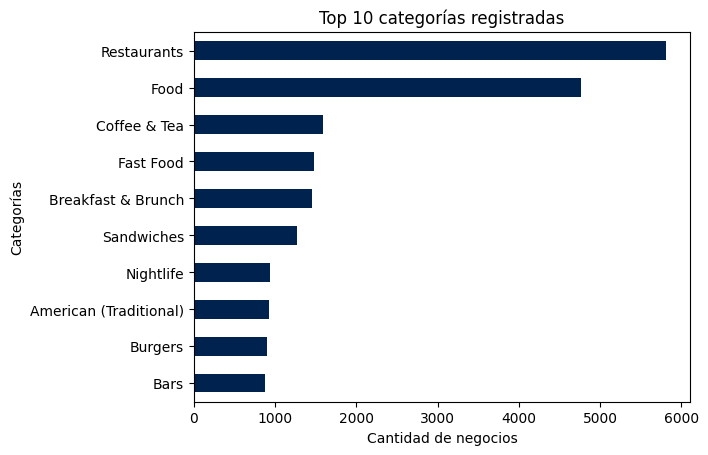

In [11]:
v3 = df1[df1['categories'].str.contains('|'.join(food_services), case=False, regex=True)]
v3 = v3['categories'].str.split(', ').explode().value_counts()

top_10 = v3.head(10)
top_10 = top_10.sort_values(ascending=True)
top_10.plot(kind='barh', colormap='cividis')
##Ajustar
plt.xlabel('Cantidad de negocios')
plt.ylabel('Categorías')
plt.title('Top 10 categorías registradas')

plt.show()

En el anterior gráfico, podemos ver cuáles son las categorías de los comercios registrados en Yelp, dentro del ámbito gastronómico y en los estados mencionados anteriormente. Observamos una distribución significativa de categorías, donde la mayoría de los locales pertenecen a la categoría "Restaurants". También, es interesante destacar la baja representación de otros tipos de establecimientos, como "Pizza", "Breakfast and Brunch", y "Fast Food" para conocer y continuar investigando sobre las preferencias de nuestros clientes.

<b>Análisis Check In</b>

In [12]:
query = "SELECT * FROM `prctica-etl.Yelp.checkin`"
df2 = client.query(query).to_dataframe()
df2.head()

,business_id,date
0,--9osgUCSDUWUkoTLdvYhQ,2018-05-16 01:02:48
1,--FcbSxK1AoEtEAxOgBaCw,2018-02-03 13:18:44
2,--FcbSxK1AoEtEAxOgBaCw,2019-06-02 18:50:02
3,--FcbSxK1AoEtEAxOgBaCw,2020-05-02 14:00:21
4,--FcbSxK1AoEtEAxOgBaCw,2020-08-12 14:27:15


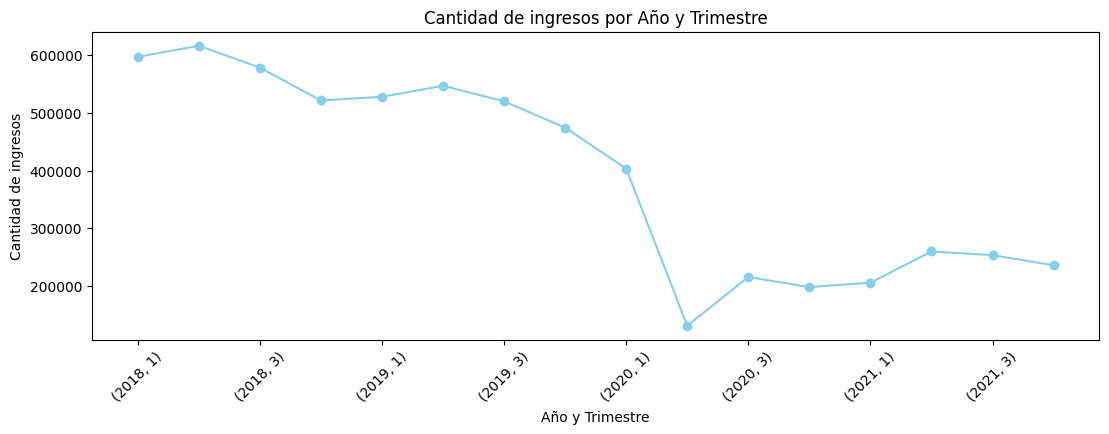

In [15]:
v4 = df2['date'].groupby([df2['date'].dt.year, df2['date'].dt.quarter]).size()

v4.plot(kind='line', marker='o', color='skyblue', figsize=(13,4))

plt.xlabel('Año y Trimestre')
plt.ylabel('Cantidad de ingresos')
plt.title('Cantidad de ingresos por Año y Trimestre')

plt.xticks(rotation=45)


plt.show()

En este caso, vamos a analizar el registro de ingresos a comercios. Se puede notar una baja entre el primer y el tercer trimestre del año 2020, producto de los efectos provocados por la pandemia. En los trimestres siguientes, aumentaron los registros de ingresos, pero de manera incomparable respecto al 2018. 

<b>Análisis Reviews</b>

In [17]:
query = "SELECT * FROM `prctica-etl.Yelp.Reviews`"
df3 = client.query(query).to_dataframe()
df3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,feeling
0,5HegGyAglDs_iDeFrtEbbA,cg29CcC2jo7fMs9HzNcPRA,-02xFuruu85XmDn2xiynJw,1,2,0,0,I've been a patient of Family Vision Source fo...,2019-12-03,Positive
1,0nZyzXhYR_eYAjoerUl82A,8hnxqVybkDPxc1eUyp6HXg,-0Ym1Wg3bXd_TDz8JtvOQg,1,0,0,0,My family and I finally went to try their ice-...,2019-07-01,Negative
2,2cXy4rWlJGps-3UcZ1-XhA,6XSqlDRL71ieMB6COOoKXg,-1MhPXk1FglglUAmuPLIGg,1,0,0,0,Bummer. We've been there so many times with gr...,2019-07-04,Positive
3,AULqnAZgYbgPLVW_mi7n3A,avy2WX19K1-YOvMIXqCzrQ,-1OSMXiFyvq6VW4Y7UpjvQ,1,2,0,0,Would never recommend this place the female d...,2021-04-10,Negative
4,ls4ysk9Ru7iLky5uXXJfZQ,pR6eKukquLqlRCB7l30w4A,-1OSMXiFyvq6VW4Y7UpjvQ,1,4,0,1,For someone who is supposed to be in a field w...,2021-05-20,Negative


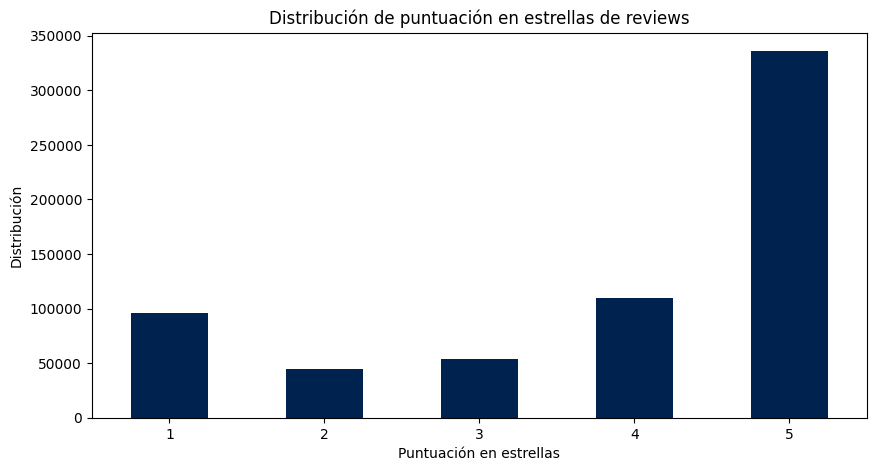

In [18]:
v5 = df3['stars'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,5))
v5.plot(kind='bar', colormap = 'cividis')

plt.xlabel('Puntuación en estrellas')
plt.ylabel('Distribución')
plt.title('Distribución de puntuación en estrellas de reviews')
plt.xticks(rotation=0)

plt.show()

En este caso, vamos a analizar las reseñas de los usuarios de Yelp. La mayoría de las reseñas llevan una calificación 5.0 estrellas, a diferencia de la puntuación de los comercios que vimos anteriormente.

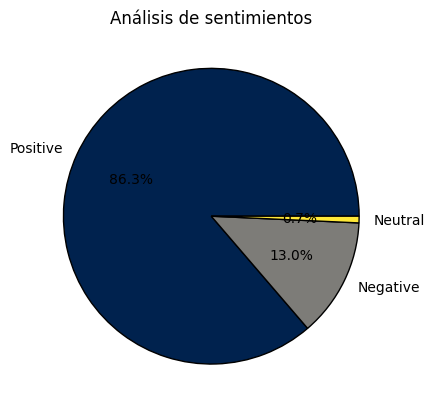

In [19]:
v7 = df3['feeling'].value_counts()

v7.plot(kind='pie', colormap = 'cividis', autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1.0})
plt.ylabel('')

plt.title('Análisis de sentimientos')

plt.show()

Analizamos una muestra (en base a los años y a los estados que seleccionamos) de las reseñas registradas en Yelp. A grandes rasgos, podemos ver que los comentarios son positivos. 

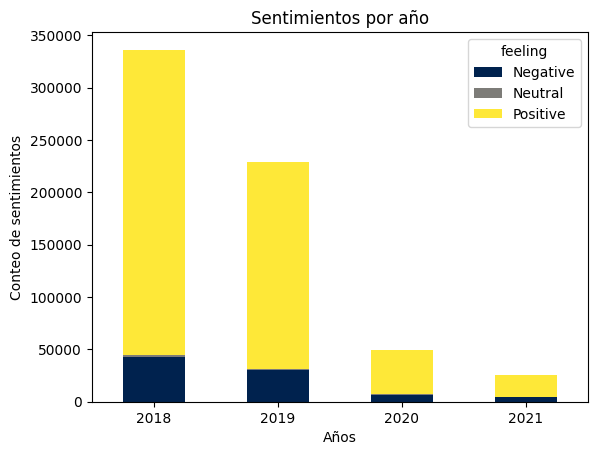

In [22]:
v8 = pd.crosstab(df3['date'].dt.year, df3['feeling'])
v8.plot(kind = 'bar', stacked=True, colormap = 'cividis')

plt.ylabel('Conteo de sentimientos')
plt.xlabel('Años')
plt.title('Sentimientos por año')
plt.xticks(rotation=0)

plt.show() 


En este gráfico podemos observar que se mantiene la misma relación entre los sentimientos (Positivo, Neutral y Negativo), pero que en los ultimos dos años, disminuyó la cantidad de reseñas. 

<b>Análisis Users</b>

In [19]:
query = "SELECT * FROM `prctica-etl.Yelp.Users`"
df4 = client.query(query).to_dataframe()
df4.head()

,user_id,review_count,yelping_since,useful,funny,cool,friends,fans
0,jmmne1DuO3N1G0xFSIYxPA,880,2011-09-08 22:54:02,1629,406,599,"EhHNBXskZ85NOQ76kxEROA, EpUfRDvjfbQhFaZZHTHAMA...",50
1,b4l_VGC5dreCCNgcCnQqaQ,12,2013-10-18 20:51:13,45,7,27,"FQfiBACNGteMDGFjcTqBTQ, usZN4mXpbuogcBsraeUvdw...",1
2,44b4Spa8dkzQ5-Uvm_3zTA,63,2010-06-19 18:40:24,54,15,8,None,2
3,ciZgo-ZesTAFR-qRMyzqmA,51,2007-08-07 15:13:35,55,38,10,"jMuxvfGtrkHSOwDe5YjSbg, hBicl52tMVsTecdZSVL-lQ...",2
4,dHJSeZ8NEMgZd6X1GUcW-w,88,2011-03-31 00:14:30,64,6,11,"mkcDO7NKIQsiBDYlZn9z3Q, TATK7JhmINXt3ShXEI2D-Q...",4


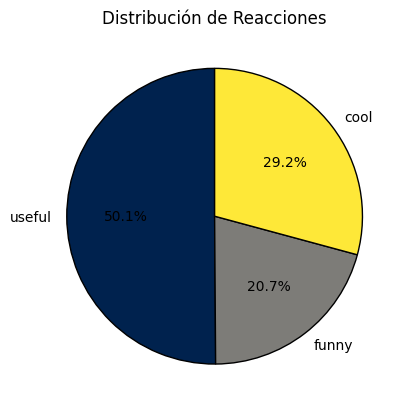

In [8]:
columns = ['useful', 'funny', 'cool']
v6 = df4[columns].sum()

v6.plot(kind='pie', colormap='cividis', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1.0})

plt.title('Distribución de Reacciones')

plt.show()

En este gráfico podemos ver cómo interactuan los usuarios de Yelp con las reseñas. La mitad de ellas están calificadas como "useful".

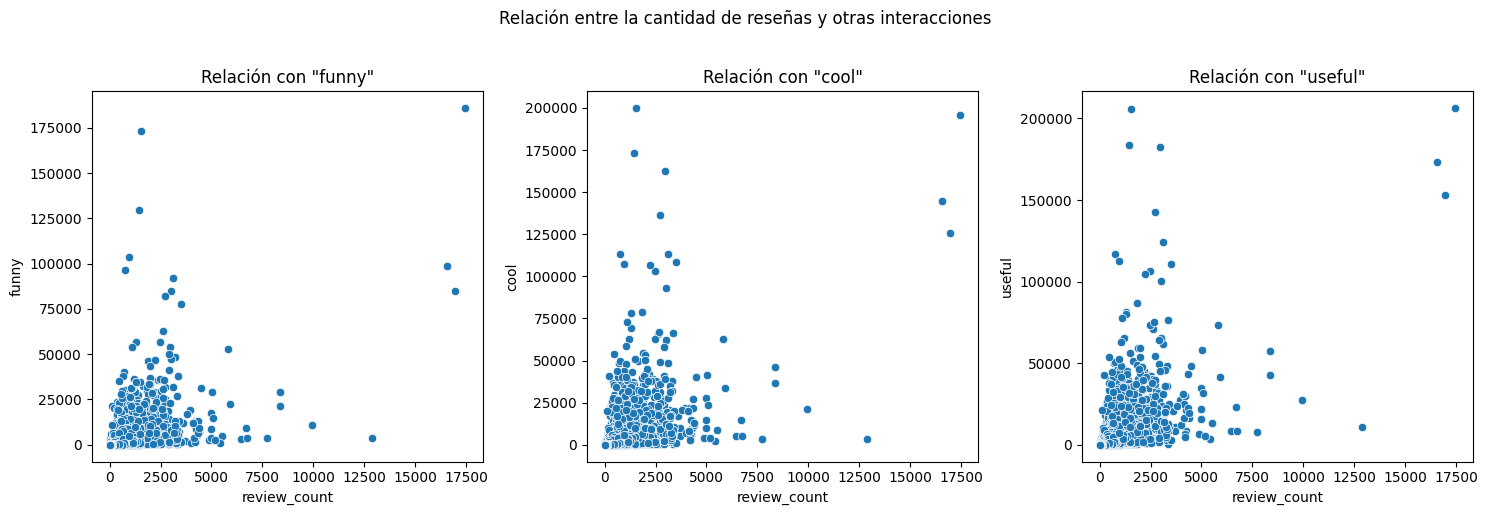

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(data=df4, x='review_count', y='funny', ax=axes[0])
axes[0].set_title('Relación con "funny"')

sns.scatterplot(data=df4, x='review_count', y='cool', ax=axes[1])
axes[1].set_title('Relación con "cool"')

sns.scatterplot(data=df4, x='review_count', y='useful', ax=axes[2])
axes[2].set_title('Relación con "useful"')


plt.suptitle('Relación entre la cantidad de reseñas y otras interacciones', y=1.02)
plt.tight_layout()
plt.show()

Este gráfico nos podría indicar que usuarios que han realizado un número bajo tanto de reseñas como de interacciones en las categorías 'funny', 'cool' y 'useful'. Esto podría representar usuarios inactivos o nuevos en la plataforma. Y se encuentran dentro de nuestros valores atípicos, aquellos usuarios con mayor cantidad de reviews e interacciones. 